# Segmentación de Figuras

- Color
    <img src='Colors.png' />
- Forma  
    <img src='form.png' />

## Importar  librerias 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
from io import StringIO
import skimage as ski
from skimage import data, io, filters
import cv2

ModuleNotFoundError: No module named 'cv2'

### Lectura de archivo de imágenes 

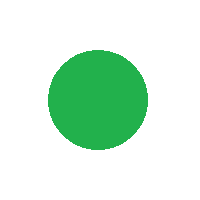

In [5]:
Verde = os.path.join("..", "data", "colores", "Train", "fig19.png")
Vr = Image.open(Verde)
Vr

## Analizamos los datos 

In [823]:
Vr.getbands()

('R', 'G', 'B')

In [824]:
np.array(Vr).shape

(200, 200, 3)

In [825]:
print(np.array(Vr)[100,100])

[ 34 177  76]


# Clasificador de color

## Preparando los datos 

Para este primer caso usaremos aprendizaje supervisado.

Los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[1,0,0],[0,1,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- negro=1,0,0
- verde=0,1,0
-  azul=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]

## Función HSV - Hue, Saturation, Value 

In [826]:
def HSV (imagen):
    img1 = imagen.shape
    x = round(img1[0]/2)
    y = round(img1[1]/2)
    M = max(imagen[x,y])
    m = min(imagen[x,y])
    R, G, B = imagen[x,y]
    #Valores para HSV
    V = M
    
    if M==0:
        S = 0
    else:
        S=  round(((M-m)/M)*255)
    
    if (M == R and G>= B):
        try:
            H = round(60*(int(int(G)-int(B))/int(M-m))) + 0
        except ZeroDivisionError:
            H = 0 
    elif(M == R and G<B):
            H = 60*((float(G)-float(B))/(float(M)-float(m))) + 360
    elif (M == G):
        try:
            H = int(60*((float(B)-float(R))/(float(M)-float(m)))) + 120
        except ZeroDivisionError:
            H = 120 
    elif (M == B):  
        try:
            H= int(60*((float(R)-float(G))/(float(M)-float(m)))) + 240
        except ZeroDivisionError:
            H = 240 
    if(H >= 359):
        H= 0 
        
    Salida = np.array([H,S,V])   
    return Salida

## Extracción de características

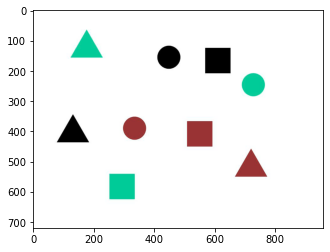

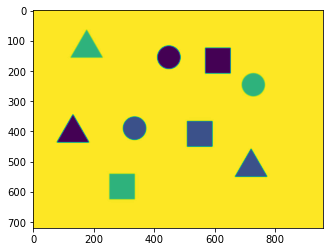

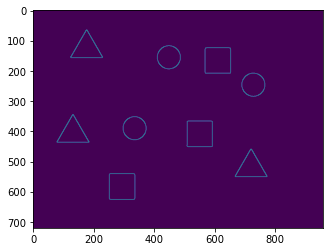

In [827]:
# Cargamos la imagen
original = cv2.imread("figuras.jpg")

fig, ax = plt.subplots()
ax.imshow(original)

# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
 
# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
 
fig, ax1 = plt.subplots()
ax1.imshow(gauss)  

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150)

fig, ax2 = plt.subplots()
ax2.imshow(canny)  

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Extraer objetos de la imagen

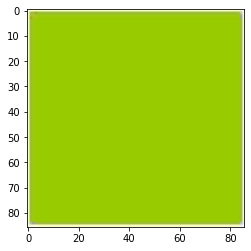

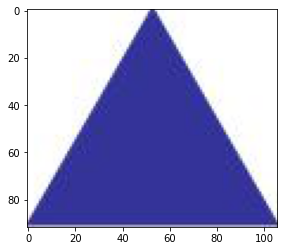

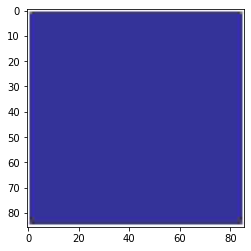

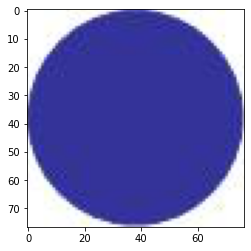

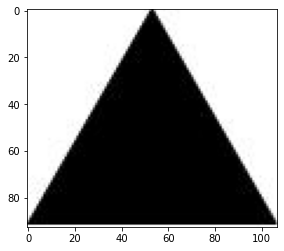

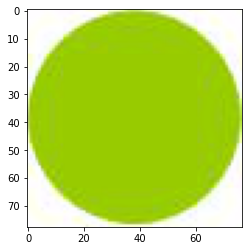

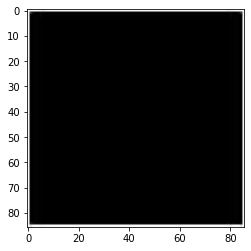

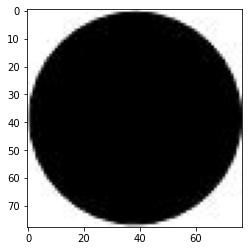

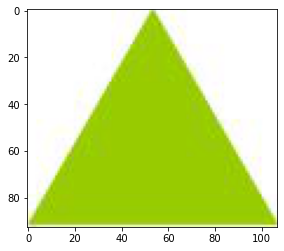

In [828]:
original2 = cv2.imread("figuras.jpg")
figuras =[]
for i in range(len(contornos)):
    x,y,w,h = cv2.boundingRect(contornos[i])
    roi = original2[y:y+h,x:x+w]
    roi1 = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    figuras.append(roi1)
    fig, ax2j = plt.subplots()
    ax2j.imshow(roi1)  

## Almacenamiento de los datos de prueba – Test

### Datos de prueba

In [829]:
datos =[]
for j in range(len(contornos)):
    V_HSV = HSV(figuras[j])
    datos.append(V_HSV)
    
Xcolor_test = np.array(datos)

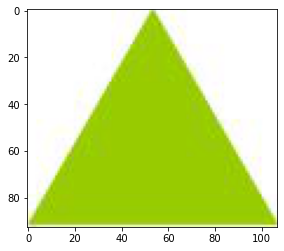

In [830]:
fig, ax2j = plt.subplots()
ax2j.imshow(figuras[8])

### Etiquetas de los datos de prueba 

In [831]:
ycolor_test = [[0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0]]

### Datos de entrenamiento 

In [832]:
datos_e =[]
for i in range(27):
    ib = "images/colores/Train/fig"+str(i+1)+".png"
    Vr = Image.open(ib)
    VRT1 = np.array(Vr)[:,:,0:3]
    datos_e.append(HSV(VRT1))
    
Xcolor_train = np.array(datos_e)

In [833]:
Xcolor_train.shape

(27, 3)

In [834]:
Xcolor_train[1]

array([240, 255, 153])

### Etiquetas de los datos de entrenamiento 

In [835]:
ycolor_train = [[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[0,0,1],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[1,0,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0],
[0,1,0]]

## Librería Sklearn – Selección de Arquitectura 

In [836]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Ajustar Parámetros del modelo

In [837]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(16, 11))

## Ajuste del modelo

In [849]:
clfcolor.fit(Xcolor_train,ycolor_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 11), solver='lbfgs')

In [850]:
pred = clfcolor.predict(Xcolor_test)

In [851]:
pred[1]

array([0, 0, 1])

## Evaluar al modelo 

In [852]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [853]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [854]:
predclass=ClassDetector(pred)
yclass=ClassDetector(ycolor_test)

In [855]:
print(accuracy_score(predclass,yclass)) 

1.0


In [856]:
print(confusion_matrix(predclass,yclass))

[[3 0 0]
 [0 3 0]
 [0 0 3]]


# Clasificador de forma 

## Función Umbral

In [803]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>25:
                z[i,j]=250
    return z

### Usando un descriptor invariante 

El problema de identificación de formas se ha estudiado durante mucho tiempo, como resultado se han propuesto metodologías de extracción de características invariantes a rotación, traslación y escalamiento. Estas características son los momentos invariables de Hu.

Para mayor detalle favor de consultar el capítulo de extracción de características del libro Gonzalez & Woods, Digital Image Processing

http://www.sc.ehu.es/ccwgrrom/transparencias/pdf-vision-1-transparencias/capitulo-8.pdf

## Función- momentos de hu 

In [804]:
# Creando una función para extraer los momentos de hu 
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

## Lectura de archivo de imágenes 

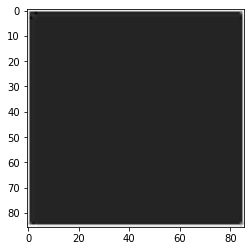

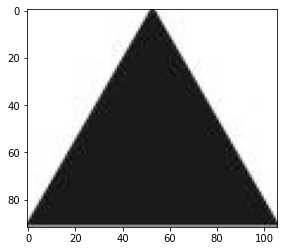

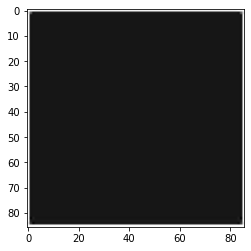

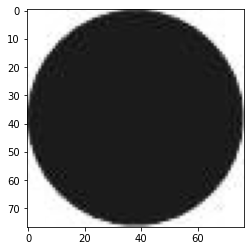

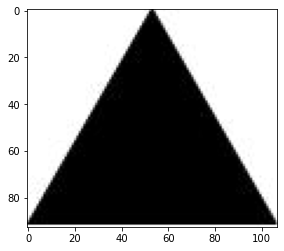

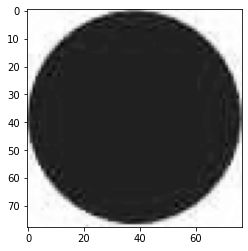

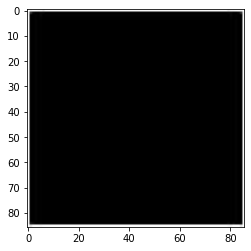

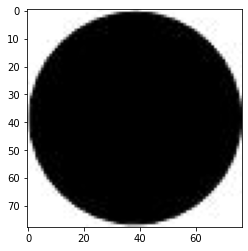

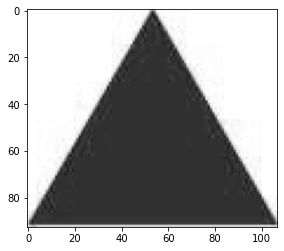

In [805]:
CDD=os.path.join("figuras.jpg")
CadD = Image.open(CDD).convert('L')
AWER = np.array(CadD)
figuras =[]
for i in range(len(contornos)):
    x,y,w,h = cv2.boundingRect(contornos[i])
    roi = AWER[y:y+h,x:x+w]
    roi1 = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    figuras.append(roi)
    fig, ax2j = plt.subplots()
    ax2j.imshow(roi,cmap='gray')  

In [806]:
hu_Characteristics(np.array(figuras[0]))

array([0.16664305, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [807]:
Caract =[]
for j in range(len(contornos)):
    Caract.append(hu_Characteristics(np.array(figuras[j])))
    
Xcaract_test = np.array(Caract)

In [808]:
ycaract_test = [[1,0,0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0]]

In [809]:
datos_e =[]
for i in range(12):
    ib = "images/Forma/Train/fig"+str(i+1)+".png"
    Vr = Image.open(ib).convert('L')
    VRT1 = np.array(Vr)
    datos_e.append(hu_Characteristics(VRT1))
    
Xcaract_train = np.array(datos_e)

In [810]:
Xcaract_train[0]

array([ 2.59405326e-01,  3.09133916e-02,  6.13880006e-03,  3.98169636e-04,
       -5.95128918e-07, -6.77211927e-05,  1.82581552e-07])

In [811]:
ycaract_train = [[0,1,0],
[0,0,1],
[1,0,0],
[0,1,0],
[0,0,1],
[1,0,0],
[0,1,0],
[0,0,1],
[1,0,0],
[0,1,0],
[0,0,1],
[1,0,0]]

## Ajustar Parámetros del modelo

In [812]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-2,
                  hidden_layer_sizes=(10, 6))

## Ajuste del modelo

In [817]:
clforma.fit(Xcaract_train,ycaract_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(10, 6), solver='lbfgs')

In [818]:
pred = clforma.predict(Xcaract_test)

## Evaluar al modelo 

In [819]:
predclass=ClassDetector(pred)
yclass=ClassDetector(ycaract_test)
print(predclass)
print(yclass)

[0, 1, 0, 2, 1, 2, 0, 2, 1]
[0, 1, 0, 2, 1, 2, 0, 2, 1]


In [820]:
print(accuracy_score(predclass,yclass)) 

1.0


In [821]:
print(confusion_matrix(predclass,yclass))

[[3 0 0]
 [0 3 0]
 [0 0 3]]
